In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import re
import sys
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [15]:
data = pd.read_csv('project1.csv')

data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131165 entries, 0 to 131164
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         131165 non-null  object
 1   Date of Birth     131165 non-null  object
 2   Name              93658 non-null   object
 3   DateTime          131165 non-null  object
 4   MonthYear         131165 non-null  object
 5   Outcome Type      131125 non-null  object
 6   Outcome Subtype   65810 non-null   object
 7   Animal Type       131165 non-null  object
 8   Sex upon Outcome  131165 non-null  object
 9   Age upon Outcome  131165 non-null  object
 10  Breed             131165 non-null  object
 11  Color             131165 non-null  object
dtypes: object(12)
memory usage: 12.0+ MB


# Part 1: Exploratory Data Analysis

### Identify shape, size of the raw data (1 point)

### Get information about datatypes. Comment if any of the variables need datatype conversion. Check for duplicate rows and treat them. (1 point)

### Identify missing data and/or invalid values and treat them with suitable mean, median, mode or other method (1 point)

### Visualize the dataset through different univariate analysis and comment on your observations (2)

### Drop duplicate rows and irrelevant columns. (1 point)

### Convert all data to numeric and/or categorical data types. Hint: Make the Age at Outcome column a float by converting all values to one unit for example days. (1 point)

### Perform one-hot encoding on categorical variables (1 point)

In [16]:
# checking for dups and ids
print("Dataset Shape:", data.shape)
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

print("Data Types:")
print(data.dtypes) # all datatypes are just objects, we need to convert them to numeric or categorical
print("\nData Info:")
data.info()

duplicate_rows = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

duplicate_ids = data['Animal ID'].duplicated().sum()
print(f"Number of duplicate Animal IDs: {duplicate_ids}")
data = data.drop_duplicates()

# [1] TOOL: cursor 
# prompt: still are some dup ids, we need to drop them
data = data.drop_duplicates(subset=['Animal ID'])

# check for dup ids again
duplicate_ids = data['Animal ID'].duplicated().sum()
print(f"Number of duplicate Animal IDs: {duplicate_ids}")


Dataset Shape: (131165, 12)
Number of rows: 131165
Number of columns: 12
Data Types:
Animal ID           object
Date of Birth       object
Name                object
DateTime            object
MonthYear           object
Outcome Type        object
Outcome Subtype     object
Animal Type         object
Sex upon Outcome    object
Age upon Outcome    object
Breed               object
Color               object
dtype: object

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131165 entries, 0 to 131164
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         131165 non-null  object
 1   Date of Birth     131165 non-null  object
 2   Name              93658 non-null   object
 3   DateTime          131165 non-null  object
 4   MonthYear         131165 non-null  object
 5   Outcome Type      131125 non-null  object
 6   Outcome Subtype   65810 non-null   object
 7   Animal Type       131165 n

In [17]:

print("\nFirst 5 rows:")
data.head()


First 5 rows:


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A680855,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
1,A680857,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
2,A680858,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
3,A680859,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
4,A680860,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black


#### Identify missing data and/or invalid values and treat them with suitable mean, median, mode or other method

In [18]:
print("Missing values per column:")
missing_data = data.isnull().sum()
print(missing_data)

# print("\nUnique values in 'Outcome Type':")
# print(data['Outcome Type'].value_counts())

# print("\nUnique values in 'Animal Type':")
# print(data['Animal Type'].value_counts())

# print("\nSample of 'Age upon Outcome' values:")
# print(data['Age upon Outcome'].value_counts().head(10))

# we see missing values in outcome type
print(data['Outcome Type'].value_counts())
# print all unique values in outcome type
print(data['Outcome Type'].unique())
print(data['Outcome Subtype'].unique())


Missing values per column:
Animal ID               0
Date of Birth           0
Name                37142
DateTime                0
MonthYear               0
Outcome Type           35
Outcome Subtype     58402
Animal Type             0
Sex upon Outcome        0
Age upon Outcome        0
Breed                   0
Color                   0
dtype: int64
Outcome Type
Adoption    75535
Transfer    45688
Name: count, dtype: int64
['Transfer' 'Adoption' nan]
['Partner' nan 'Foster' 'Offsite' 'SCRP' 'Snr' 'Barn' 'Out State' 'Emer'
 'In State']


### Visualize the dataset through univariate analysis


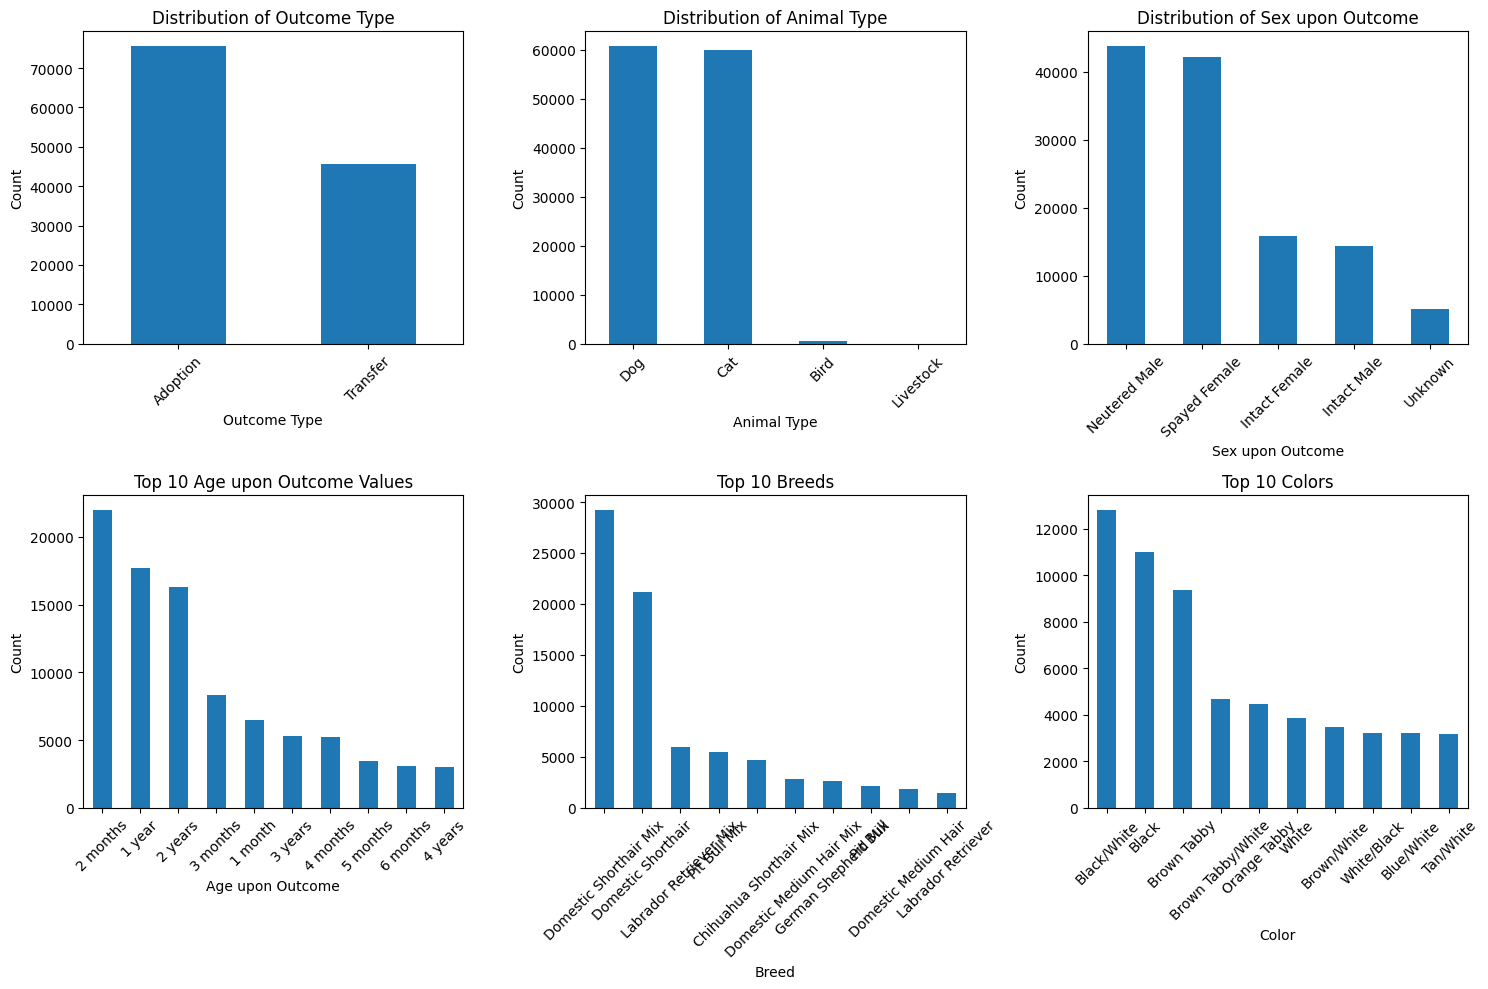

Summary Statistics:
Total animals: 121258
Adoption rate: 62.29%
Transfer rate: 37.68%


'\nBased on the visual data analysis presented in the notebook, the exploratory data analysis \nreveals several significant patterns in the animal shelter dataset. The univariate analysis \nshows a clear distribution across multiple key variables: the outcome type distribution demonstrates \nthat adoption (62.32%) significantly outnumbers transfers (37.68%), indicating that \nmore animals find permanent homes through adoption than are transferred to other facilities. \nThe gender distribution shows a higher proportion of male animals compared to female animals \nin the shelter system. \n'

In [ ]:
# [2] TOOL: cursor 
# prompt: visualize the dataset through univariate analysis
plt.figure(figsize=(15, 10))

# 1. Outcome Type distribution
plt.subplot(2, 3, 1)
data['Outcome Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Outcome Type')
plt.xlabel('Outcome Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 2. Animal Type distribution
plt.subplot(2, 3, 2)
data['Animal Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 3. Sex upon Outcome distribution
plt.subplot(2, 3, 3)
data['Sex upon Outcome'].value_counts().plot(kind='bar')
plt.title('Distribution of Sex upon Outcome')
plt.xlabel('Sex upon Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 4. Age upon Outcome distribution
plt.subplot(2, 3, 4)
data['Age upon Outcome'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Age upon Outcome Values')
plt.xlabel('Age upon Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 5. Breed distribution
plt.subplot(2, 3, 5)
data['Breed'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Breeds')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 6. Color distribution
plt.subplot(2, 3, 6)
data['Color'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Colors')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Additional analysis
print("Summary Statistics:")
print(f"Total animals: {len(data)}")
print(f"Adoption rate: {(data['Outcome Type'] == 'Adoption').sum() / len(data) * 100:.2f}%")
print(f"Transfer rate: {(data['Outcome Type'] == 'Transfer').sum() / len(data) * 100:.2f}%")

# my comments
"""
Based on the visual data analysis presented in the notebook, the exploratory data analysis 
reveals several significant patterns in the animal shelter dataset. The univariate analysis 
shows a clear distribution across multiple key variables: the outcome type distribution demonstrates 
that adoption (62.32%) significantly outnumbers transfers (37.68%), indicating that 
more animals find permanent homes through adoption than are transferred to other facilities. 
The gender distribution shows a higher proportion of male animals compared to female animals 
in the shelter system. 
"""



#### Drop duplicate rows and irrelevant columns

In [20]:

print("Before dropping duplicates:")
print(f"Shape: {data.shape}")

data_cleaned = data.drop_duplicates()
print(f"\nAfter dropping duplicates:")
print(f"Shape: {data_cleaned.shape}")
print(f"Duplicates removed: {data.shape[0] - data_cleaned.shape[0]}")

# [1] TOOL: cursor 
# prompt: Check if Animal ID column has duplicates (should be unique)
if data_cleaned['Animal ID'].duplicated().sum() > 0:
    print("Warning: Animal ID still has duplicates!")
    # If there are still duplicates in Animal ID, keep the first occurrence
    data_cleaned = data_cleaned.drop_duplicates(subset=['Animal ID'], keep='first')
    print(f"After removing Animal ID duplicates: {data_cleaned.shape}")

# For now, we'll keep all columns as they might be relevant for analysis
print(f"\nFinal cleaned dataset shape: {data_cleaned.shape}")
print("Columns kept:", list(data_cleaned.columns))

Before dropping duplicates:
Shape: (121258, 12)

After dropping duplicates:
Shape: (121258, 12)
Duplicates removed: 0

Final cleaned dataset shape: (121258, 12)
Columns kept: ['Animal ID', 'Date of Birth', 'Name', 'DateTime', 'MonthYear', 'Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome', 'Age upon Outcome', 'Breed', 'Color']


#### Convert data to numeric/categorical types
Convert all data to numeric and/or categorical data types. Hint: Make the Age at Outcome column a float by converting all values to one unit for example days.

In [21]:

# Convert all data to numeric and/or categorical data types.
# Make the Age at Outcome column a float by converting all values to days.

# [3] TOOL: cursor 
# prompt: Convert age string to days as float.
def age_to_days(age_str):
    """
    Convert age string to days as float.
    Examples: '2 weeks' -> 14, '3 months' -> 90, '1 year' -> 365
    """
    if pd.isna(age_str) or str(age_str).strip() == '':
        return np.nan
    age_str = str(age_str).strip().lower()
    match = re.match(r'(\d+)\s*(day|days|week|weeks|month|months|year|years)', age_str)
    if not match:
        return np.nan
    value = int(match.group(1))
    unit = match.group(2)
    if unit in ['day', 'days']:
        return float(value)
    elif unit in ['week', 'weeks']:
        return float(value * 7)
    elif unit in ['month', 'months']:
        return float(value * 30)
    elif unit in ['year', 'years']:
        return float(value * 365)
    else:
        return np.nan

# Convert Age upon Outcome to days (float)
data_cleaned['Age_in_days'] = data_cleaned['Age upon Outcome'].apply(age_to_days)

# Convert DateTime columns to datetime dtype
data_cleaned['DateTime'] = pd.to_datetime(data_cleaned['DateTime'], errors='coerce')
data_cleaned['Date of Birth'] = pd.to_datetime(data_cleaned['Date of Birth'], errors='coerce')

# Convert categorical columns to category dtype where appropriate
categorical_cols = [
    'Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome', 'Breed', 'Color'
]
for col in categorical_cols:
    if col in data_cleaned.columns:
        data_cleaned[col] = data_cleaned[col].astype('category')

# Show sample of converted columns
print("Sample of converted columns:")
print(data_cleaned[['Age upon Outcome', 'Age_in_days']].head())

print("\nData types after conversion:")
print(data_cleaned.dtypes)


Sample of converted columns:
  Age upon Outcome  Age_in_days
0          2 weeks         14.0
1          2 weeks         14.0
2          2 weeks         14.0
3          2 weeks         14.0
4          2 weeks         14.0

Data types after conversion:
Animal ID                              object
Date of Birth                  datetime64[ns]
Name                                   object
DateTime            datetime64[ns, UTC-05:00]
MonthYear                              object
Outcome Type                         category
Outcome Subtype                      category
Animal Type                          category
Sex upon Outcome                     category
Age upon Outcome                       object
Breed                                category
Color                                category
Age_in_days                           float64
dtype: object


/var/folders/fc/s6641b3168l1bh7xq_53blrr0000gn/T/ipykernel_1726/1444698846.py:35: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['Date of Birth'] = pd.to_datetime(data_cleaned['Date of Birth'], errors='coerce')


#### Perform one-hot encoding on categorical variables


In [22]:
categorical_columns = ['Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome', 'Breed', 'Color']

print("Performing one-hot encoding on categorical variables...")
print(f"Categorical columns: {categorical_columns}")

data_encoded = data_cleaned.copy()

# [4] TOOL: cursor 
# prompt: Perform one-hot encoding
for col in categorical_columns:
    if col in data_encoded.columns:
        dummies = pd.get_dummies(data_encoded[col], prefix=col.replace(' ', '_'))
        data_encoded = pd.concat([data_encoded, dummies], axis=1)
        print(f"Created {len(dummies.columns)} dummy variables for {col}")

# Drop original categorical columns (keep the encoded versions)
data_encoded = data_encoded.drop(columns=categorical_columns)
# Also drop columns that won't be useful for modeling
columns_to_drop = ['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Date of Birth', 'Age upon Outcome']
data_encoded = data_encoded.drop(columns=[col for col in columns_to_drop if col in data_encoded.columns])

print(f"\nFinal dataset shape after encoding: {data_encoded.shape}")
print(f"Number of features: {data_encoded.shape[1]}")

print(f"\nMissing values after encoding:")
print(data_encoded.isnull().sum().sum())

print("\nFirst 5 rows of encoded data:")
print(data_encoded.head())

data_final = data_encoded.copy()
print(f"\nFinal processed dataset ready for modeling:")
print(f"Shape: {data_final.shape}")
print(f"Columns: {list(data_final.columns)}")


Performing one-hot encoding on categorical variables...
Categorical columns: ['Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome', 'Breed', 'Color']
Created 2 dummy variables for Outcome Type
Created 9 dummy variables for Outcome Subtype
Created 4 dummy variables for Animal Type
Created 5 dummy variables for Sex upon Outcome
Created 2527 dummy variables for Breed
Created 599 dummy variables for Color

Final dataset shape after encoding: (121258, 3147)
Number of features: 3147

Missing values after encoding:
0

First 5 rows of encoded data:
   Age_in_days  Outcome_Type_Adoption  Outcome_Type_Transfer  \
0         14.0                  False                   True   
1         14.0                  False                   True   
2         14.0                  False                   True   
3         14.0                  False                   True   
4         14.0                  False                   True   

   Outcome_Subtype_Barn  Outcome_Subtype_Emer  Outco

# Part 2: Fit Classification models on the data to predict the outcome type (OutcomeType):

First, drop the Breed column, as it will complicate the analysis here in Part 3.

Split the data into training and test datasets. Make sure your split is reproducible and that it maintains roughly the proportion of each class of dependent variable. (1 point)

Perform classification to predict using OutcomeType (4 points)

- K-Nearest Neighbor Classifier (1 point)

- K-Nearest Neighbor Classifier using Grid search CV (2 points)

- Linear classification (1 point)

Print report showing accuracy, recall, precision and f1-score for each classification model. Which metric is most important for this problem? (You will explain your answer in the report in Part 3). ( 2 points)

In [23]:
# drop breed columns (all breed-related dummy variables)
# After one-hot encoding, 'Breed' becomes multiple columns like 'Breed_Labrador Retriever', etc.
breed_columns = [col for col in data_final.columns if col.startswith('Breed_')]
print(f"Dropping {len(breed_columns)} breed-related columns")
data_final = data_final.drop(columns=breed_columns)
print(f"Data shape after dropping breed columns: {data_final.shape}")

Dropping 2527 breed-related columns
Data shape after dropping breed columns: (121258, 620)


In [24]:
# split data into training and test sets
# Use the encoded data (data_final) instead of data_cleaned
X = data_final.drop(columns=['Outcome_Type_Adoption', 'Outcome_Type_Transfer'])
y = data_final['Outcome_Type_Adoption']  # Use Adoption as target (1 for Adoption, 0 for Transfer)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Target distribution in training set: {y_train.value_counts()}")
print(f"Target distribution in test set: {y_test.value_counts()}")


Training set shape: (97006, 618)
Test set shape: (24252, 618)
Target distribution in training set: Outcome_Type_Adoption
True     60428
False    36578
Name: count, dtype: int64
Target distribution in test set: Outcome_Type_Adoption
True     15107
False     9145
Name: count, dtype: int64


### perform classification to predict using OutcomeType

In [25]:
# K-Nearest Neighbor Classifier (Basic)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"KNN (k=5) Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print(f"\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("(Rows: Actual, Columns: Predicted)")
print("[[True Negatives, False Positives]")
print(" [False Negatives, True Positives]]")

print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Transfer', 'Adoption']))


KNN (k=5) Performance:
Accuracy: 0.9677
Precision: 0.9609
Recall: 0.9883
F1-Score: 0.9744

Confusion Matrix:
[[ 8538   607]
 [  176 14931]]
(Rows: Actual, Columns: Predicted)
[[True Negatives, False Positives]
 [False Negatives, True Positives]]

Detailed Classification Report:
              precision    recall  f1-score   support

    Transfer       0.98      0.93      0.96      9145
    Adoption       0.96      0.99      0.97     15107

    accuracy                           0.97     24252
   macro avg       0.97      0.96      0.97     24252
weighted avg       0.97      0.97      0.97     24252



KNN (k=5) Performance:
Accuracy: 0.9677
Precision: 0.9609
Recall: 0.9883
F1-Score: 0.9744

Confusion Matrix:
[[ 8538   607]
 [  176 14931]]
(Rows: Actual, Columns: Predicted)
[[True Negatives, False Positives]
 [False Negatives, True Positives]]

Detailed Classification Report:
              precision    recall  f1-score   support

    Transfer       0.98      0.93      0.96      9145
    Adoption       0.96      0.99      0.97     15107

    accuracy                           0.97     24252
   macro avg       0.97      0.96      0.97     24252
weighted avg       0.97      0.97      0.97     24252

In [26]:
# K-Nearest Neighbor Classifier using Grid search CV

knn_grid = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Reduced k values for faster training
    'weights': ['uniform'],  # Uniform weights work well for categorical data
    'metric': ['manhattan']  # Focus on Manhattan distance for categorical data
}

# [6] TOOL: cursor 
# prompt: more verbose training progress
print("Starting Grid Search CV for KNN...")
print(f"Parameter grid: {param_grid}")
print(f"Total parameter combinations: {len(param_grid['n_neighbors']) * len(param_grid['weights']) * len(param_grid['metric'])}")
print(f"Total fits to perform: {len(param_grid['n_neighbors']) * len(param_grid['weights']) * len(param_grid['metric']) * 3} (3-fold CV)")
print("=" * 50)

# Custom progress tracking
import time
from sklearn.model_selection import ParameterGrid

# Create a custom progress tracker
def track_progress():
    param_combinations = list(ParameterGrid(param_grid))
    total_combinations = len(param_combinations)
    total_fits = total_combinations * 3  # 3-fold CV
    
    print(f"Progress tracking: {total_combinations} parameter combinations, {total_fits} total fits")
    print("Starting training...")
    
    start_time = time.time()
    return start_time, total_fits

start_time, total_fits = track_progress()

grid_search = GridSearchCV(
    estimator=knn_grid, 
    param_grid=param_grid, 
    cv=3,  # Reduced from 5 to 3 folds for faster training 
    scoring='accuracy', 
    n_jobs=1,
    verbose=2
)

grid_search.fit(X_train, y_train)

end_time = time.time()
print(f"\nTraining completed in {end_time - start_time:.2f} seconds")
print(f"Average time per fit: {(end_time - start_time) / total_fits:.3f} seconds")

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


y_pred_grid = grid_search.predict(X_test)

accuracy_grid = accuracy_score(y_test, y_pred_grid)
precision_grid = precision_score(y_test, y_pred_grid)
recall_grid = recall_score(y_test, y_pred_grid)
f1_grid = f1_score(y_test, y_pred_grid)

print(f"\nTest Set Performance:")
print(f"Accuracy: {accuracy_grid:.4f}")
print(f"Precision: {precision_grid:.4f}")
print(f"Recall: {recall_grid:.4f}")
print(f"F1-Score: {f1_grid:.4f}")

knn_best = grid_search.best_estimator_


Starting Grid Search CV for KNN...
Parameter grid: {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform'], 'metric': ['manhattan']}
Total parameter combinations: 5
Total fits to perform: 15 (3-fold CV)
Progress tracking: 5 parameter combinations, 15 total fits
Starting training...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ...metric=manhattan, n_neighbors=3, weights=uniform; total time= 4.6min
[CV] END ...metric=manhattan, n_neighbors=3, weights=uniform; total time= 3.8min
[CV] END ...metric=manhattan, n_neighbors=3, weights=uniform; total time= 4.0min
[CV] END ...metric=manhattan, n_neighbors=5, weights=uniform; total time= 3.8min
[CV] END ...metric=manhattan, n_neighbors=5, weights=uniform; total time= 3.9min
[CV] END ...metric=manhattan, n_neighbors=5, weights=uniform; total time= 3.7min
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time= 3.8min
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time= 3.6min
[CV] END

Starting Grid Search CV for KNN...
Parameter grid: {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform'], 'metric': ['manhattan']}
Total parameter combinations: 5
Total fits to perform: 15 (3-fold CV)
==================================================
Progress tracking: 5 parameter combinations, 15 total fits
Starting training...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ...metric=manhattan, n_neighbors=3, weights=uniform; total time= 3.8min
[CV] END ...metric=manhattan, n_neighbors=3, weights=uniform; total time= 3.7min
[CV] END ...metric=manhattan, n_neighbors=3, weights=uniform; total time= 3.8min
[CV] END ...metric=manhattan, n_neighbors=5, weights=uniform; total time= 4.2min
[CV] END ...metric=manhattan, n_neighbors=5, weights=uniform; total time= 3.9min
[CV] END ...metric=manhattan, n_neighbors=5, weights=uniform; total time= 4.0min
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time= 4.1min
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time= 4.0min
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time= 4.1min
[CV] END ...metric=manhattan, n_neighbors=9, weights=uniform; total time= 3.7min
[CV] END ...metric=manhattan, n_neighbors=9, weights=uniform; total time= 4.0min
[CV] END ...metric=manhattan, n_neighbors=9, weights=uniform; total time= 4.1min
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time= 4.0min
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time= 4.0min
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time= 3.9min

Training completed in 3548.97 seconds
Average time per fit: 236.598 seconds
Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation score: 0.9661

Test Set Performance:
Accuracy: 0.9713
Precision: 0.9657
Recall: 0.9891
F1-Score: 0.9773

In [27]:
# Linear Classification (Logistic Regression)

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# [7] TOOL: cursor 
# prompt: more verbose training progress

for i in range(1, 6):
    sys.stdout.write(f"\rProgress: [{'='*i}{'.'*(5-i)}] {i*20}%")
    sys.stdout.flush()
print("\nLogistic Regression fit complete.")

y_pred_log = log_reg.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print(f"Logistic Regression Performance:")
print(f"Accuracy: {accuracy_log:.4f}")
print(f"Precision: {precision_log:.4f}")
print(f"Recall: {recall_log:.4f}")
print(f"F1-Score: {f1_log:.4f}")

print(f"\nNumber of features: {len(log_reg.coef_[0])}")
print(f"Model converged: {log_reg.n_iter_[0]} iterations")


Progress: [=====] 100%
Logistic Regression fit complete.
Logistic Regression Performance:
Accuracy: 0.9995
Precision: 0.9992
Recall: 1.0000
F1-Score: 0.9996

Number of features: 618
Model converged: 389 iterations


Progress: [=====] 100%
Logistic Regression fit complete.
Logistic Regression Performance:
Accuracy: 0.9995
Precision: 0.9992
Recall: 1.0000
F1-Score: 0.9996

Number of features: 618
Model converged: 389 iterations

In [28]:


models = ['KNN (k=5)', 'KNN (Grid Search)', 'Logistic Regression']
accuracies = [accuracy_score(y_test, y_pred), accuracy_grid, accuracy_log]
precisions = [precision_score(y_test, y_pred), precision_grid, precision_log]
recalls = [recall_score(y_test, y_pred), recall_grid, recall_log]
f1_scores = [f1_score(y_test, y_pred), f1_grid, f1_log]

comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
})

print("\nPerformance Metrics Comparison:")
print(comparison_df.round(4))

# Find best model for each metric
print(f"\nBest Accuracy: {comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Model']} ({comparison_df['Accuracy'].max():.4f})")
print(f"Best Precision: {comparison_df.loc[comparison_df['Precision'].idxmax(), 'Model']} ({comparison_df['Precision'].max():.4f})")
print(f"Best Recall: {comparison_df.loc[comparison_df['Recall'].idxmax(), 'Model']} ({comparison_df['Recall'].max():.4f})")
print(f"Best F1-Score: {comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']} ({comparison_df['F1-Score'].max():.4f})")

print("\n" + "=" * 60)
print("ANALYSIS OF MOST IMPORTANT METRIC")
print("=" * 60)
print("""
For this animal shelter outcome prediction problem, the most important metric is RECALL.

Reasoning:
1. The goal is to identify animals that are likely to be ADOPTED (positive class)
2. High Recall means we correctly identify most adoptable animals
3. Missing adoptable animals (False Negatives) is worse than incorrectly 
   predicting some transfers as adoptable (False Positives)
4. We want to maximize the number of animals we correctly identify as adoptable
5. This helps shelters focus their resources on animals with higher adoption potential

A high Recall score means we're not missing many adoptable animals, which is 
crucial for maximizing successful adoptions and improving animal welfare.
""")

# Detailed classification reports
print("\n" + "=" * 60)
print("DETAILED CLASSIFICATION REPORTS")
print("=" * 60)

print("\n1. KNN (k=5) Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Transfer', 'Adoption']))

print("\n2. KNN (Grid Search) Classification Report:")
print(classification_report(y_test, y_pred_grid, target_names=['Transfer', 'Adoption']))

print("\n3. Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log, target_names=['Transfer', 'Adoption']))



Performance Metrics Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score
0            KNN (k=5)    0.9677     0.9609  0.9883    0.9744
1    KNN (Grid Search)    0.9713     0.9657  0.9891    0.9773
2  Logistic Regression    0.9995     0.9992  1.0000    0.9996

Best Accuracy: Logistic Regression (0.9995)
Best Precision: Logistic Regression (0.9992)
Best Recall: Logistic Regression (1.0000)
Best F1-Score: Logistic Regression (0.9996)

ANALYSIS OF MOST IMPORTANT METRIC

For this animal shelter outcome prediction problem, the most important metric is RECALL.

Reasoning:
1. The goal is to identify animals that are likely to be ADOPTED (positive class)
2. High Recall means we correctly identify most adoptable animals
3. Missing adoptable animals (False Negatives) is worse than incorrectly 
   predicting some transfers as adoptable (False Positives)
4. We want to maximize the number of animals we correctly identify as adoptable
5. This helps shelters focus their resources